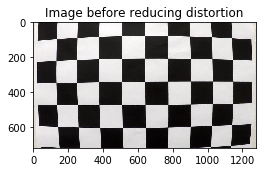

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import math
import statistics

%matplotlib inline

img = mpimg.imread('camera_cal/calibration1.jpg')

f, (ax) = plt.subplots(1,1, figsize=(4,5))
ax.set_title('Image before reducing distortion')
ax.imshow(img)
plt.show()

In [2]:
cal_imgs = glob.glob('camera_cal/calibration*.jpg')
print('# of images used for camera calibration:', len(cal_imgs))

# of images used for camera calibration: 20


In [3]:
# Storing the object points and image points for all the images from the image calibration list

objpoints = [] #3D points coordinates representing the true (i.e. undistorted) positions of chessboard corners
imgpoints = [] #2D points coordinates from the chessboard corners in an image

In [4]:
# Prepare object points. Based on pictures we have a 9x6 chessboard (i.e. number of valid corners)
# Creating an array that will store the (x, y, z) values of each corner
# For example the value of the first corner will be (0, 0, 0)
# Note: since chessboard is flat, the z value of each corner coordinate will always be 0 here

# Creating an initial array with 9x6 = 54 lists each holding 3 values (i.e. x, y, and z values)
objp = np.zeros((9*6,3), np.float32)

# Right now all the lists values in objp are (0, 0, 0) so there are just placeholders. 
# We will generate the right coordinate for each list value in objp
objp[:, :2] = np.mgrid[0:9,0:6].T.reshape(-1, 2) # overwrite x, y coordinates with new correct values for each point

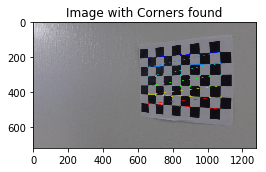

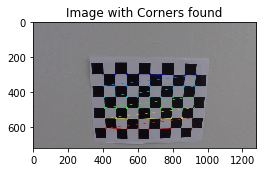


9x6 corners found for 17 images
9x5 corners not found for: ['camera_cal/calibration1.jpg', 'camera_cal/calibration4.jpg', 'camera_cal/calibration5.jpg']


In [5]:
# Loop through all the images in the list of calibrating images
# Find the chessboard corners on each image
corners_9x6 = []
corners_not_found = []
counter = 0

for img_path in cal_imgs:
    # read the image
    img = mpimg.imread(img_path)
    # convert an image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #plt.imshow(gray)
    #plt.show()

    counter +=1 
   
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If corners are detected, add object points and image points from the chessboard image analyzed
    if ret == True:
        #print('Found 9x6 corners for:', img_path)
        
        imgpoints.append(corners)
        objpoints.append(objp)
        corners_9x6.append(img_path)

        # draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        
        # show an image with the corners found
        if counter ==  4 or counter == 9:
            f, (ax) = plt.subplots(1,1, figsize=(4,5))
            ax.set_title('Image with Corners found')
            ax.imshow(img)
            plt.show()

    
    else:
        #print("Didn't find 9x6 corners for:", img_path)
        corners_not_found.append(img_path)


print('\n9x6 corners found for {} images'.format(len(corners_9x6)))
print('9x5 corners not found for:', corners_not_found)

In [6]:
# Reading a grayscale, distorted image, which we're going to use for final calibration
img = mpimg.imread('camera_cal/calibration2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#Calibrating the camera using a grayscale image
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

def show_undst(img):
    # Undistorting an image
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    
    return [img, dst]


In [7]:
cal_img = mpimg.imread('camera_cal/calibration2.jpg')
test = show_undst(cal_img)

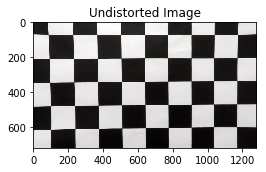

In [8]:
# Showing two images side by side to show the result of the undistortion
def show_undst_side(img):
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    """
    # Creating the figure to display the images
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    imgplot = plt.imshow(img)
    ax1.set_title('Distorted Image')
    """
    

    #imgplot = plt.imshow(dst)
    f, (ax) = plt.subplots(1,1, figsize=(4,5))
    ax.set_title('Undistorted Image')
    #ax2.set_title('Undistorted Image')
    ax.imshow(dst)
    plt.show()
    

img_show = mpimg.imread('camera_cal/calibration1.jpg')
show_undst_side(img_show)
#img_show = mpimg.imread('camera_cal/calibration4.jpg')
#show_undst_side(img_show)

road image is of shape  (720, 1280, 3)


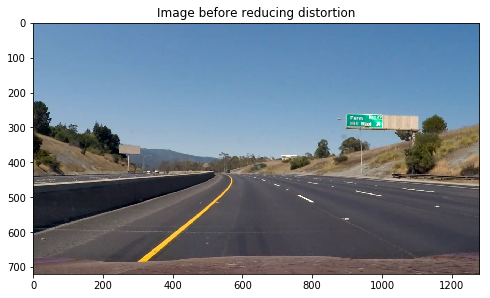

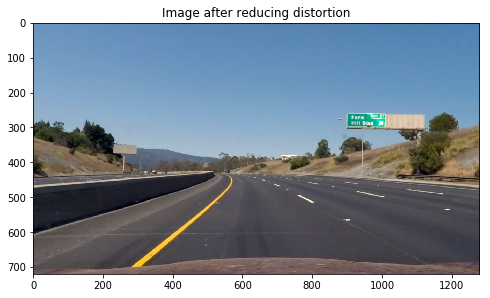

In [9]:
# Read one of the test images
reference = 'test_images/0.jpg'
img = mpimg.imread(reference)
test = show_undst(img)
img_width = img.shape[1]
img_height = img.shape[0]


print('road image is of shape ', img.shape)

f, (ax) = plt.subplots(1,1, figsize=(8,5))
ax.set_title('Image before reducing distortion')
ax.imshow(img)
plt.show()

f, (ax) = plt.subplots(1,1, figsize=(8,5))
ax.set_title('Image after reducing distortion')
ax.imshow(test[1])
plt.show()


In [10]:
# xy coordinates of the points that represent a rectangle on a bird's eye view of the road
bt_l_x = 185  # x of bottom-left corner 193
bt_r_x = 1095  # x of bottom-right corner 1103
top_l_x = bt_l_x+410  # x of top-left corner 399
top_r_x = bt_r_x-410  # x of top-right corner 416
bt_y = 720 # 716
top_y = 450 # 450
"""
bt_l_x = 203  # x of bottom-left corner 193
bt_r_x = 1127  # x of bottom-right corner 1103
top_l_x = 585  # x of top-left corner 399
top_r_x = 695  # x of top-right corner 416
bt_y = 720 # 716
top_y = 460 # 450
"""

'\nbt_l_x = 203  # x of bottom-left corner 193\nbt_r_x = 1127  # x of bottom-right corner 1103\ntop_l_x = 585  # x of top-left corner 399\ntop_r_x = 695  # x of top-right corner 416\nbt_y = 720 # 716\ntop_y = 460 # 450\n'

In [11]:
#### Function to warp/unwarp perspective in an image
#### Returns a list with: warped image (i.e. bird's eye view), the warped image unwarped (i.e. perspective reapplied)
def warp(img):
    img_size = (img.shape[1], img.shape[0])
    
    # Coordinates of 4 points on image. These points form a rectangle when unwarped
    src = np.float32(
        [[top_r_x, top_y],
         [bt_r_x, bt_y],
         [bt_l_x, bt_y],
         [top_l_x, top_y]])
    """
    # Coordinates of these 4 points when unwarped
    dst = np.float32(
        [[960, 0],
         [960, 720],
         [320, 720],
         [320, 0]])
    
    """
    # Coordinates of these 4 points when unwarped
    dst = np.float32(
        [[bt_r_x-150, 0],
         [bt_r_x-150, bt_y],
         [bt_l_x+150, bt_y],
         [bt_l_x+150, 0]])
    
    
    # Compute the perspective transform
    M = cv2.getPerspectiveTransform(src, dst)
    
    # Compute the inverse of perspective transform, by just swapping the dst and src parameters
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    # Create warped image by using linear interpolation
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    reverted = cv2.warpPerspective(img, Minv, img_size, flags=cv2.INTER_LINEAR)
    
    
    return [warped, reverted]

In [12]:
# Apply the warp function to our undistorted image
transformed_imgs = warp(test[1])

# Make a copy of the warped image (we don't want to modify the original)
warped_img = transformed_imgs[0].copy()
warped_img_c = transformed_imgs[0].copy()
# Make a copy of the perspective image (we don't want to modify the original)
persp_img = test[1].copy()

In [13]:
#### visual comparison of the original image (with perspective 'rectangle') and warped image (bird's eye view)
def compare_imgs(undistored_img, bird_view_img):

    f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

    ax1.set_title('Original image')
    # Draw a red polygon following the lane perspective
    pts = np.array([[bt_l_x,bt_y],[top_l_x,top_y],[top_r_x,top_y],[bt_r_x,bt_y]], np.int32)
    pts = pts.reshape((-1,1,2))
    cv2.polylines(undistored_img,[pts],True,(255,0,0),4)
    ax1.imshow(undistored_img)

    ax2.set_title('Warped image')
    # Draw a red polygon showing parallel lines
    real_pts = np.array([[bt_l_x+150,bt_y],[bt_l_x+150,0],[bt_r_x-150,0],[bt_r_x-150,bt_y]], np.int32)
    #real_pts = np.array([[bt_l_x+150,670],[bt_l_x+150,720],[bt_l_x+220,720],[bt_l_x+220,670]], np.int32)
    #real_pts = real_pts.reshape((-1,1,2))
    #cv2.polylines(bird_view_img,[real_pts],True,(0,0,255),4)
    cv2.line(bird_view_img, (bt_l_x+150,bt_y), (bt_l_x+150,0), (255, 0, 0), 10)
    cv2.line(bird_view_img, (bt_r_x-150,bt_y), (bt_r_x-150,0), (0, 0, 255), 10)
    ax2.imshow(bird_view_img)

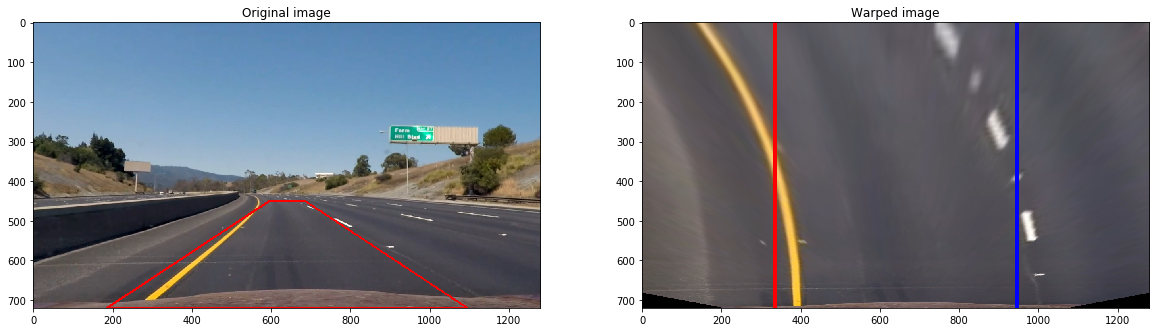

In [14]:
compare_imgs(persp_img, warped_img_c)

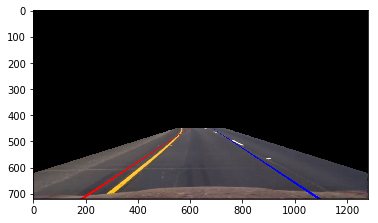

In [15]:
# Revert warped img to original perspective
reverted_imgs = warp(warped_img_c)
revert_back = reverted_imgs[1]
plt.imshow(revert_back)
plt.show()

In [16]:
#### Visual comparison of warped images
def compare_three_imgs(w_img1, w_img2, w_img3):
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,10))

    ax1.set_title('Original warped image')
    ax1.imshow(w_img1)
    
    ax2.set_title('Image copy with rectangle')
    ax2.imshow(w_img2)
    
    ax3.set_title('Copy of original warped image')
    ax3.imshow(w_img3)
    
    
#plt.imshow(warped_img)

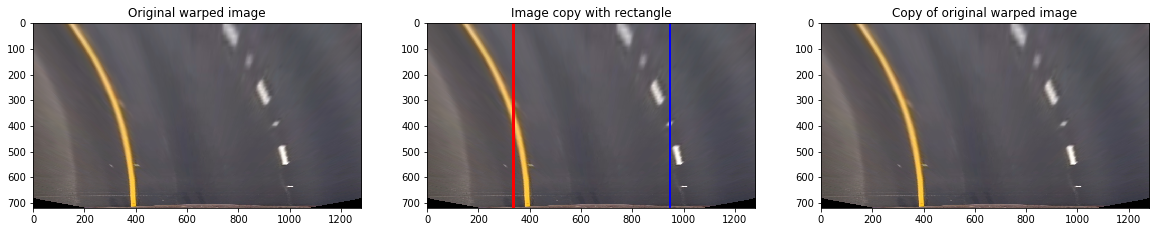

In [17]:
compare_three_imgs(transformed_imgs[0], warped_img_c, warped_img)

In [18]:
def absolute_sobel(img, orient='x', thresh_min=20, thresh_max=100):
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply cv2.Sobel()
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    elif orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    # Take the absolute value of the output from cv2.Sobel()
    abs_sobel = np.absolute(sobel)
    # Scale the result to an 8-bit range (0-255)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    return scaled_sobel

In [19]:
#### Converting an image to HLS color space, because Hue is helpful to catch yellow lanes
#### while Lightness and Saturation are helpful to find both lanes
def apply_hls(img):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hue_img = hls[:,:,0]
    light_img = hls[:,:,1]
    sat_img = hls[:,:,2]
    
    return (hue_img, light_img, sat_img)

In [20]:
#### Converting an image to a binary showing only the pixels whose value was within a threshold
def to_binary(img, thresh_min, thresh_max):
    binary = np.zeros_like(img)
    binary[(img >= thresh_min) & (img <= thresh_max)] = 1
    # Create binary_output
    return binary

In [21]:
#### Take an image and apply to it all the filters (sobel and HLS)
def apply_filters(img):
    sb = absolute_sobel(img)
    sb_binary = to_binary(sb, 20, 100)
    
    hue, light, sat = apply_hls(img)
    hue_binary = to_binary(hue, 17, 50)
    light_binary =  to_binary(light, 190, 255)
    sat_binary = to_binary(sat, 100, 255)
    
    return(sb, sb_binary, hue, hue_binary, light, light_binary, sat, sat_binary)

In [22]:
sobel, sobel_binary, H, H_binary, L, L_binary, S, S_binary = apply_filters(warped_img)

In [23]:
#### Visual comparison of images
def compare_two_imgs(w_img1, w_img2, title_1, title_2):
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

    ax1.set_title(title_1)
    ax1.imshow(w_img1, cmap = 'gray')
    
    ax2.set_title(title_2)
    ax2.imshow(w_img2, cmap = 'gray') 

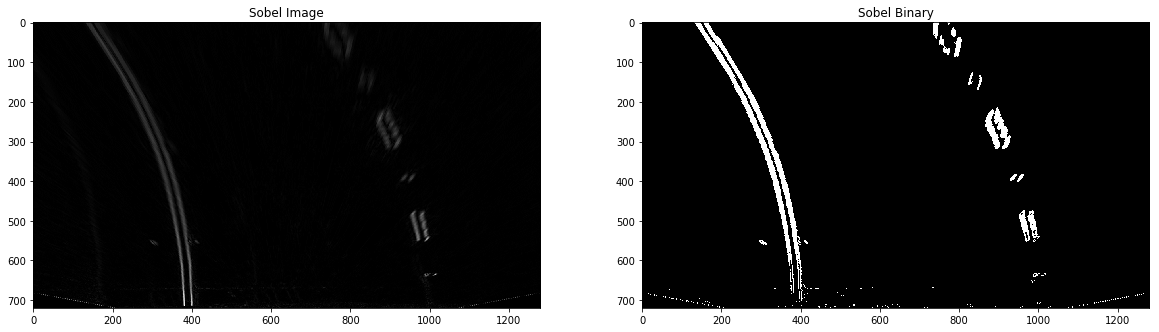

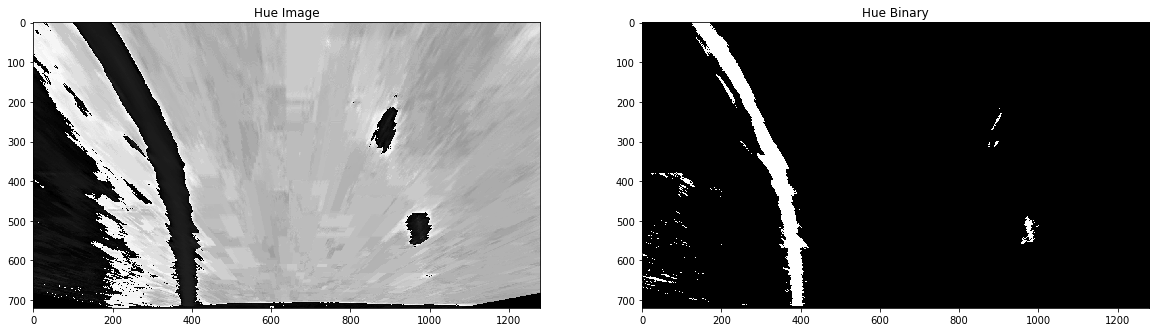

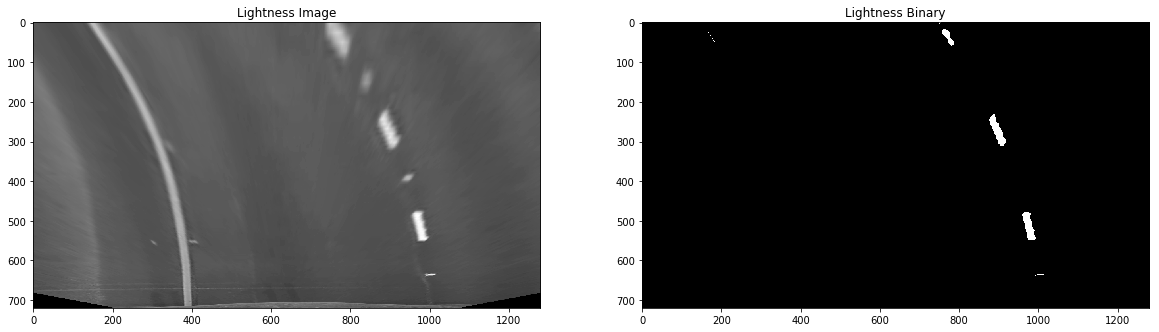

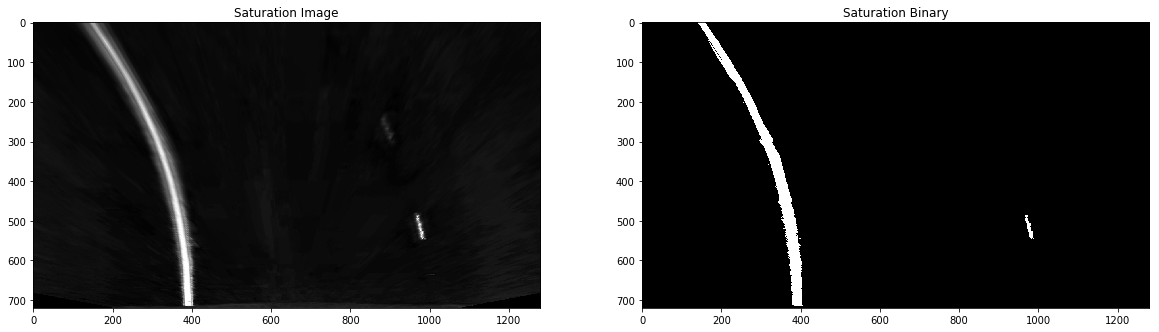

In [24]:
compare_two_imgs(sobel, sobel_binary, "Sobel Image", "Sobel Binary")
compare_two_imgs(H, H_binary, "Hue Image", "Hue Binary")
compare_two_imgs(L, L_binary, "Lightness Image", "Lightness Binary")
compare_two_imgs(S, S_binary, "Saturation Image", "Saturation Binary")

In [25]:
#### Combine the binary results to get the pixels that are good candidates
#### to draw lane lines
def show_lines(sb_bin, hue_bin, light_bin, sat_bin):
    binary = np.zeros_like(sb_bin)
    binary[(sb_bin == 1) | (hue_bin == 1) | (light_bin == 1) | (sat_bin == 1)] = 1
    # Create binary_output
    return binary

In [26]:
#### Combine the binary results to get the pixels that are good candidates
#### to draw lane lines
def show_lines2(sb_bin, hue_bin, light_bin, sat_bin):
    binary = np.zeros_like(sb_bin)
    binary[(((sb_bin == 1) | (hue_bin == 1)) & ((light_bin == 1) | (sat_bin == 1))) | (((sb_bin == 1) | (light_bin == 1)) & ((hue_bin == 1) | (sat_bin == 1)))] = 1
    # Create binary_output
    return binary

In [27]:
final = show_lines(sobel_binary, H_binary, L_binary, S_binary)
final2 = show_lines2(sobel_binary, H_binary, L_binary, S_binary)
binary_warped = final2.copy()

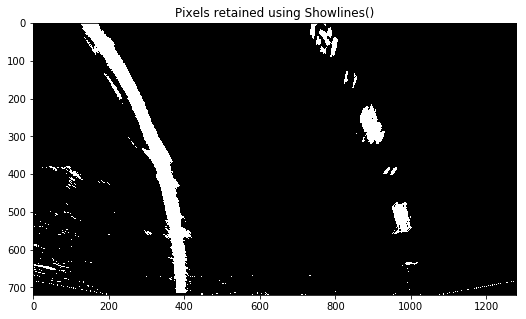

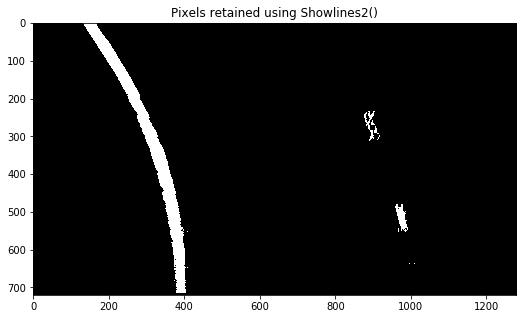

In [28]:
font = {'family': 'sans serif',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }

f, (ax) = plt.subplots(1,1, figsize=(10,5))
ax.set_title('Pixels retained using Showlines()')
#plt.text(0.9, 0.92,'Top Right', ha='center', va='center', fontdict=font, transform=ax.transAxes)
#plt.text(0.1, 0.92,'Top Left', ha='center', va='center', fontdict=font, transform=ax.transAxes)
#plt.text(0.5, 0.05,'Center', ha='center', va='center', fontdict=font, transform=ax.transAxes)
ax.imshow(final, cmap = 'gray')
plt.show()

#plt.imshow(binary_warped, cmap = 'gray')
#plt.title('Pixels retained using modified function: Showlines2()')
#plt.show()

f, (ax) = plt.subplots(1,1, figsize=(10,5))
ax.set_title('Pixels retained using Showlines2()')
#plt.title('Pixels retained using modified function: Showlines2()')
ax.imshow(binary_warped, cmap = 'gray')
plt.show()


In [29]:
# Define global variables that we use to store info about our previously found lanes
glob_left_fit_list = []
glob_right_fit_list = []
glob_curvatures = []
glob_mean_curvs = []
glob_curvature = 0.0
glob_dist_ctr = 0.0
glob_counter = 0

In [30]:
#### Thorough lane search
def thorough_lane_search(leftx_base, rightx_base, binary_warped, nonzerox, nonzeroy):
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    
    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin

        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)
    
    return [left_lane_inds, right_lane_inds]


In [31]:
#### Quick lane search
def quick_lane_search(binary_warped, nonzerox, nonzeroy):
    global glob_left_fit_list 
    global glob_right_fit_list
    global glob_counter
    
    A_coeff = []
    B_coeff = []
    C_coeff = []
    
    glob_counter += 1
    for i in glob_right_fit_list:
        A_coeff.append(i[0])
        B_coeff.append(i[1])
        C_coeff.append(i[2])
        med_A = statistics.median(A_coeff)
        med_B = statistics.median(B_coeff)
        med_C = statistics.median(C_coeff)
    
    left_fit = glob_left_fit_list[-1]
    right_fit = np.array([med_A, med_B, med_C])
    #right_fit = glob_right_fit_list[-1]
    if glob_counter <20:
        print("left_fit is", left_fit)
        print("right_fit ", right_fit)
    
    margin = 80
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    return [left_lane_inds, right_lane_inds]

In [32]:
# Find the max, min and median value in a list of numbers
def find_max_min_med(num_list):
    maximum = max(num_list)
    minimum = min(num_list)
    median = statistics.median(num_list)
    std_dev = stdev(num_list)
    return [maximum, minimum, median, std_dev]

In [33]:
# Find a line that fits each of the lane lines, using a binary image
def draw_lanes(binary_warped):
    global glob_left_fit_list 
    global glob_right_fit_list
    
    left_lane_inds = None 
    right_lane_inds = None
    # List to store polynomial lines coefficients from previous frames
    A_coeff_right = []
    B_coeff_right = []
    C_coeff_right = []
    
    
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[int(binary_warped.shape[0]/2):,:], axis=0)
    
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    # If there are no saved polynomial coefficients in glob_left_fit_list or glob_right_fit_list  
    # (which means no lanes were found in the previous frame or frames)
    # then we need to use a more extensive method to find lanes
    if (len(glob_left_fit_list) == 0 or len(glob_right_fit_list) == 0):
        left_lane_inds, right_lane_inds = thorough_lane_search(leftx_base, rightx_base, binary_warped, nonzerox, nonzeroy)
        print("doing thorough search")
    # If we do already have saved polynomial coefficients in glob_left_fit_list and glob_right_fit_list
    # then we can use them to create narrower ranges to search for the left and right lanes
    else:
        left_lane_inds, right_lane_inds = quick_lane_search(binary_warped, nonzerox, nonzeroy)
    
    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
  
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    # Now that we have our left_fit and right_fit for the lanes, find their curvatures in meters
    find_curvature(binary_warped, left_fit, right_fit, lefty, leftx, righty, rightx)
    # find_curvature() will update a global variable that we can then evaluate in process_image()  
    
    # With left_fit and right_fit for the lanes, we can also find the deviation from the center of the lane
    car_offset(binary_warped, left_fit, right_fit)
    # car offset() will update a global variable that we can use in process_image
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    # Overwrite the global variables that we use to store info about our previously found lanes
    if len(glob_left_fit_list)>=7:
        glob_left_fit_list = glob_left_fit_list[1:]
    glob_left_fit_list.append(left_fit)
    if len(glob_right_fit_list)>=5:    
        glob_right_fit_list = glob_right_fit_list[1:]
    glob_right_fit_list.append(right_fit)
    #print(len(glob_right_fit_list))
    #print(len(glob_left_fit_list))
    
    
    # Create an image to draw on and an image to show the selection window
    #out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    #out_img = warped_img
    out_img = np.zeros_like(warped_img)
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    #out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    #out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [255, 0, 0]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    lane_window1 = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    lane_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    lane_pts = np.hstack((lane_window1, lane_window2))

    ###* To show properly drawn lane lines, reinsert the code in quotes at bottom of this cell
    
    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([lane_pts]), (0, 255, 0))
    #cv2.fillPoly(window_img, np.int_([left_line_pts]), (255, 0, 0))
    #cv2.fillPoly(window_img, np.int_([right_line_pts]), (0, 0, 255))
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [255, 0, 0]
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    return result


In [34]:
##### Calculating radius of curvature

# The y values on image increase from top of image to bottom
# so the y value at the bottom is equal to the number of lines in the image: image.shape[0]
# We can evaluate the radius of curvature of left and right lanes at any line of the image
# I'll choose the maximum y-value, corresponding to the bottom of the image
def find_curvature(binary_warped, left_fit, right_fit, lefty, leftx, righty, rightx):
    global glob_curvatures 
    global glob_curvature
    global glob_mean_curvs
    
    y_eval = binary_warped.shape[0]
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    #print(left_curverad, right_curverad)
    # Example values: 1926.74 1908.48

    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 48/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/610 # meters per pixel in x dimension 3.7/700

    # Fit new polynomials to x,y in world space
    #left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    #right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)

    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    
    glob_curvatures.append([left_curverad, right_curverad])
    glob_curvatures = glob_curvatures[-21:]
    curr_mean_curv = np.mean(glob_curvatures)
    
    glob_mean_curvs.append(curr_mean_curv)
    if len(glob_mean_curvs) >= 42:
        glob_mean_curvs = glob_mean_curvs[-21:]
        temp_curv = np.median(glob_mean_curvs)
        glob_curvature = temp_curv
    elif len(glob_mean_curvs) == 21:
        temp_curv = np.median(glob_mean_curvs)
        glob_curvature = temp_curv
    elif glob_curvature == 0.0:
        glob_curvature = np.median(glob_mean_curvs)


In [35]:
#### calculating offset of car with regards to center of lane
# we want the x position of each line at the bottom of the image: binary_warped.shape[0]
def car_offset(binary_warped, left_fit, right_fit):
    global glob_dist_ctr
    global glob_counter
    xm_per_pix = 3.7/610 # meters per pixel in x dimension 3.7/700
    
    ploty = binary_warped.shape[0]
    bottom_left_x = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    bottom_right_x = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    center_of_lane = int((bottom_right_x - bottom_left_x)/2 + bottom_left_x)
    center_of_img = binary_warped.shape[1]/2

    if glob_counter <20:
        print("distance between lane lines",bottom_right_x-bottom_left_x)
        print("x position of center of lane", center_of_lane)
        #print(center_of_img)

    glob_dist_ctr = (center_of_lane - center_of_img) * xm_per_pix
    #print(glob_dist_ctr)


doing thorough search
distance between lane lines 636.412391777
x position of center of lane 706


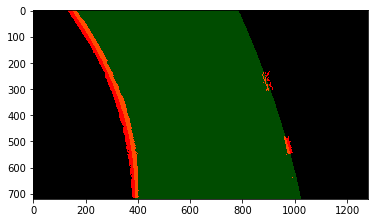

In [36]:
bev_color_lanes = draw_lanes(binary_warped)
plt.imshow(bev_color_lanes)

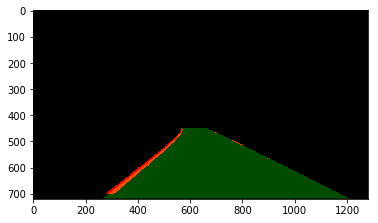

In [37]:
# Revert warped img to original
reverted_imgs = warp(bev_color_lanes)
revert_back = reverted_imgs[1]
plt.imshow(revert_back)
plt.show()

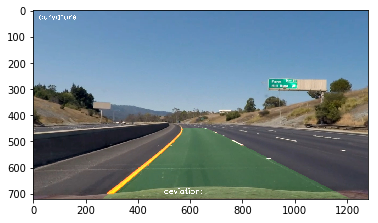

In [38]:
# Mixing the warped image showing the lane with the original picture
origin_copy = test[1].copy()
blended_image = cv2.addWeighted(origin_copy, 1.0, revert_back, 0.5, 0.0)
font = cv2.FONT_HERSHEY_SIMPLEX
curv_info_img = cv2.putText(blended_image,'curvature',(20,35), font, 1,(255,255,255),2)
final_image = cv2.putText(blended_image,'deviation:',(500,700), font, 1,(255,255,255),2)
plt.imshow(final_image)


In [39]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [40]:
def process_image(img_feed):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    global glob_curvatures
    global glob_curvature
    global glob_dist_ctr
    
    # copying the image just provided
    img = np.copy(img_feed)
    
    # undistort the image
    undst_img = show_undst(img)
    # return [img, dst]
    
    # Tranform the image so that it looks like bird's eye view
    warped_img = warp(undst_img[1])
    # return [warped, reverted]
    
    # apply all the filters (sobel, HLS)
    # return(sb, sb_binary, hue, hue_binary, light, light_binary, sat, sat_binary)
    sobel, sobel_binary, H, H_binary, L, L_binary, S, S_binary = apply_filters(warped_img[0])
    
    # Determine what data points to keep to find the lanes
    final_binary = show_lines2(sobel_binary, H_binary, L_binary, S_binary)
    # return binary
    binary_warped = final_binary.copy()
    
    # Get bird's eye view image with left and right lanes drawn and the space in between colored
    bev_color_lanes = draw_lanes(binary_warped)
    # return an RGB image
    
    # Revert warped img with colored lanes to original
    reverted_imgs = warp(bev_color_lanes)
    revert_back = reverted_imgs[1]
    
    blended_image = cv2.addWeighted(img_feed, 1.0, revert_back, 0.5, 0.0)
    font = cv2.FONT_HERSHEY_SIMPLEX
    mid_curvature = glob_curvature
    curv_info_img = cv2.putText(blended_image,"Curvature: {:.00f}m".format(mid_curvature) ,(20,35), font, 1,(255,255,255),2)
    final_image = cv2.putText(blended_image,'Deviation: {:.01f}m'.format(glob_dist_ctr),(500,700), font, 1,(255,255,255),2)
    
    return final_image

left_fit is [ -5.05012142e-04   6.96024858e-01   1.49001039e+02]
right_fit  [ -1.65765975e-04   4.53232358e-01   7.84358818e+02]
distance between lane lines 633.175579788
x position of center of lane 705


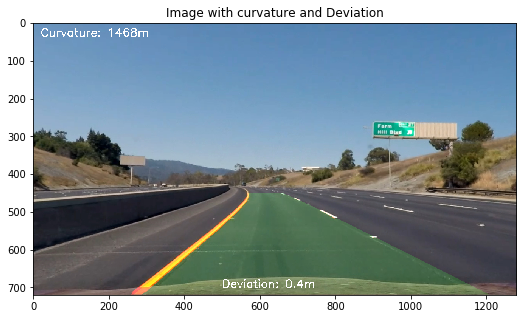

In [41]:
origin_copy = test[1].copy()
new_pic = process_image(origin_copy)

f, (ax) = plt.subplots(1,1, figsize=(10,5))
ax.set_title('Image with curvature and Deviation')
ax.imshow(new_pic)
plt.show()

In [84]:
print(glob_curvatures)
print(glob_mean_curvs)
print(glob_curvature)

[]
[]
0.0


In [83]:
# Reset to 0 the global variables that we use to store info about our previously found lanes
glob_left_fit_list = []
glob_right_fit_list = []
glob_curvatures = []
glob_mean_curvs = []
glob_curvature = 0.0
glob_dist_ctr = 0.0

In [85]:
white_output = 'Save.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

doing thorough search
[MoviePy] >>>> Building video Save.mp4
[MoviePy] Writing video Save.mp4


100%|█████████▉| 1260/1261 [04:35<00:00,  5.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: Save.mp4 

CPU times: user 5min 50s, sys: 47.6 s, total: 6min 37s
Wall time: 4min 37s


In [ ]:
"""white_output = 'videoSaveShad5.mp4'
clip1 = VideoFileClip("shadows.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)
"""

## Writeup Template

### You can use this file as a template for your writeup if you want to submit it as a markdown file, but feel free to use some other method and submit a pdf if you prefer.

---

**Advanced Lane Finding Project**

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

[//]: # (Image References)

[image1]: ./examples/undistort_output.png "Undistorted"
[image2]: ./test_images/test1.jpg "Road Transformed"
[image3]: ./examples/binary_combo_example.jpg "Binary Example"
[image4]: ./examples/warped_straight_lines.jpg "Warp Example"
[image5]: ./examples/color_fit_lines.jpg "Fit Visual"
[image6]: ./examples/example_output.jpg "Output"
[video1]: ./project_video.mp4 "Video"

## [Rubric](https://review.udacity.com/#!/rubrics/571/view) Points

### Here I will consider the rubric points individually and describe how I addressed each point in my implementation.  

---

### Writeup / README

#### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one.  You can submit your writeup as markdown or pdf.  [Here](https://github.com/udacity/CarND-Advanced-Lane-Lines/blob/master/writeup_template.md) is a template writeup for this project you can use as a guide and a starting point.  

You're reading it!

### Camera Calibration

#### 1. Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image.

The code for this step is contained in the first code cell of the IPython notebook located in "./examples/example.ipynb" (or in lines # through # of the file called `some_file.py`).  

I start by preparing "object points", which will be the (x, y, z) coordinates of the chessboard corners in the world. Here I am assuming the chessboard is fixed on the (x, y) plane at z=0, such that the object points are the same for each calibration image.  Thus, `objp` is just a replicated array of coordinates, and `objpoints` will be appended with a copy of it every time I successfully detect all chessboard corners in a test image.  `imgpoints` will be appended with the (x, y) pixel position of each of the corners in the image plane with each successful chessboard detection.  

I then used the output `objpoints` and `imgpoints` to compute the camera calibration and distortion coefficients using the `cv2.calibrateCamera()` function.  I applied this distortion correction to the test image using the `cv2.undistort()` function and obtained this result: 

![alt text][image1]

### Pipeline (single images)

#### 1. Provide an example of a distortion-corrected image.

To demonstrate this step, I will describe how I apply the distortion correction to one of the test images like this one:
![alt text][image2]

#### 2. Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image.  Provide an example of a binary image result.

I used a combination of color and gradient thresholds to generate a binary image (thresholding steps at lines # through # in `another_file.py`).  Here's an example of my output for this step.  (note: this is not actually from one of the test images)

![alt text][image3]

#### 3. Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.

The code for my perspective transform includes a function called `warper()`, which appears in lines 1 through 8 in the file `example.py` (output_images/examples/example.py) (or, for example, in the 3rd code cell of the IPython notebook).  The `warper()` function takes as inputs an image (`img`), as well as source (`src`) and destination (`dst`) points.  I chose the hardcode the source and destination points in the following manner:

```python
src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])
```

This resulted in the following source and destination points:

| Source        | Destination   | 
|:-------------:|:-------------:| 
| 585, 460      | 320, 0        | 
| 203, 720      | 320, 720      |
| 1127, 720     | 960, 720      |
| 695, 460      | 960, 0        |

I verified that my perspective transform was working as expected by drawing the `src` and `dst` points onto a test image and its warped counterpart to verify that the lines appear parallel in the warped image.

![alt text][image4]

#### 4. Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial?

Then I did some other stuff and fit my lane lines with a 2nd order polynomial kinda like this:

![alt text][image5]

#### 5. Describe how (and identify where in your code) you calculated the radius of curvature of the lane and the position of the vehicle with respect to center.

I did this in lines # through # in my code in `my_other_file.py`

#### 6. Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly.

I implemented this step in lines # through # in my code in `yet_another_file.py` in the function `map_lane()`.  Here is an example of my result on a test image:

![alt text][image6]

---

### Pipeline (video)

#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!).

Here's a [link to my video result](./project_video.mp4)

---

### Discussion

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

Here I'll talk about the approach I took, what techniques I used, what worked and why, where the pipeline might fail and how I might improve it if I were going to pursue this project further.  


In [56]:
# Find a line that fits each of the lane lines, using a binary image
def draw_lanes(binary_warped):
    global glob_left_fit_list 
    global glob_right_fit_list
    
    left_lane_inds = None 
    right_lane_inds = None
    # List to store polynomial lines coefficients from previous frames
    A_coeff_right = []
    B_coeff_right = []
    C_coeff_right = []
    
    
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[int(binary_warped.shape[0]/2):,:], axis=0)
    
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    # If there are no saved polynomial coefficients in glob_left_fit_list or glob_right_fit_list  
    # (which means no lanes were found in the previous frame or frames)
    # then we need to use a more extensive method to find lanes
    if (len(glob_left_fit_list) == 0 or len(glob_right_fit_list) == 0):
        left_lane_inds, right_lane_inds = thorough_lane_search(leftx_base, rightx_base, binary_warped, nonzerox, nonzeroy)
        print("doing thorough search")
    # If we do already have saved polynomial coefficients in glob_left_fit_list and glob_right_fit_list
    # then we can use them to create narrower ranges to search for the left and right lanes
    else:
        left_lane_inds, right_lane_inds = quick_lane_search(binary_warped, nonzerox, nonzeroy)
    
    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
  
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    # Checking that the polynomial coefficients found on the current frame make sense
    # Retrieving all the coefficients stored in the glob_right_fit_list
    if len(glob_right_fit_list) > 0:
        for coeff_list in glob_right_fit_list:
            A_coeff_right.append(coeff_list[0])
            B_coeff_right.append(coeff_list[1])
            C_coeff_right.append(coeff_list[2])

            A_results = find_max_min_med(A_coeff_right)
            if (abs(right_fit[0]-A_results[2]) > (A_results[3]*2)):
                left_lane_inds, right_lane_inds = thorough_lane_search(leftx_base, rightx_base, binary_warped, nonzerox, nonzeroy)
                # Extract left and right line pixel positions
                leftx = nonzerox[left_lane_inds]
                lefty = nonzeroy[left_lane_inds] 
                rightx = nonzerox[right_lane_inds]
                righty = nonzeroy[right_lane_inds] 

                # Fit a second order polynomial to each
                left_fit = np.polyfit(lefty, leftx, 2)
                right_fit = np.polyfit(righty, rightx, 2)
            
            
    ###print("right_fit coefficients are", right_fit)
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    # Overwrite the global variables that we use to store info about our previously found lanes
    if len(glob_left_fit_list)>=5:
        glob_left_fit_list = glob_left_fit_list[1:]
    glob_left_fit_list.append(left_fit)
    if len(glob_right_fit_list)>=5:    
        glob_right_fit_list = glob_right_fit_list[1:]
    glob_right_fit_list.append(right_fit)
    print(len(glob_right_fit_list))
    #print(len(glob_left_fit_list))
    
    
    # Create an image to draw on and an image to show the selection window
    #out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    #out_img = warped_img
    out_img = np.zeros_like(warped_img)
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    #out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    #out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    lane_window1 = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    lane_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    lane_pts = np.hstack((lane_window1, lane_window2))

    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-10, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+10, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))

    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-10, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+10, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    
    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([lane_pts]), (0, 255, 120))
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (255, 0, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0, 0, 255))
    result = cv2.addWeighted(out_img, 1, window_img, 1.0, 0)
    
    return result